In [1]:
#Import statements
import tensorflow as tf
import os
import utils

In [2]:
#Constants
batch_size = 1
iterations = 100000
sample_directory = './figs'
model_directory = './models'
im_size = 64
channels = 3
z_size = 100

Here, we're going to make some placeholders. These will be used to feed our data into
while we are training our GAN

In [3]:
z_in = tf.placeholder(shape=[batch_size,z_size],dtype=tf.float32)
real_in = tf.placeholder(shape=[batch_size,im_size,im_size,channels],dtype=tf.float32)

Next, we're going to build our GAN. This will be done using some functions that I've already
provided in utils.py

In [4]:
g = utils.generator(z_in,im_size,channels,batch_size)
d = utils.discriminator(real_in,batch_size)
d2 = utils.discriminator(g,batch_size,reuse=True)

#Just some housekeeping that will be convenient later
tvars = tf.trainable_variables()
g_params = []
d_params = []
for var in tvars:
    if 'g_' in var.name:
        g_params.append(var)
    elif 'd_' in var.name:
        d_params.append(var)

In this section, we'll be defining our loss functions for each of the neural networks we've built.

In [5]:
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d,labels=tf.ones_like(d)))
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d2,labels=tf.zeros_like(d2)))
d_loss = d_loss_real + d_loss_fake
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d2,labels=tf.ones_like(d2)))

Lastly, we'll define our training operations that we'll use to train the GAN

In [6]:
trainerD = tf.train.AdamOptimizer(2e-4,beta1=0.5).minimize(d_loss,var_list=d_params)
trainerG = tf.train.AdamOptimizer(2e-4,beta1=0.5).minimize(g_loss,var_list=g_params)

Finally, we'll train the GAN

Training
Gen Loss: 0.470634 Disc Loss: 3.8442


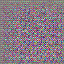

Gen Loss: 4.6432e-06 Disc Loss: 0.016682


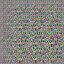

Gen Loss: 3.35305e-09 Disc Loss: 0.018565


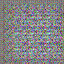

Gen Loss: 5.40312e-08 Disc Loss: 0.008661


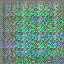

Gen Loss: 0.00015392 Disc Loss: 29.5309


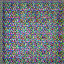

Gen Loss: 0.00083668 Disc Loss: 0.514794


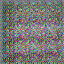

Gen Loss: 5.54535 Disc Loss: 4.51361


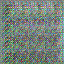

Gen Loss: 3.18696e-09 Disc Loss: 1.10778


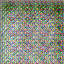

In [ ]:
from IPython.display import Image,display
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    saver = tf.train.Saver()
    print "Training"
    for i in range(iterations):
        gLoss,dLoss = utils.train(real_in,z_in,trainerG,g_loss,trainerD,d_loss,sess,im_size=im_size,batch_size=batch_size,z_size=z_size)
        if i%10 ==0:
            print("Gen Loss: " + str(gLoss) + " Disc Loss: " + str(dLoss))
            utils.sample(z_size,batch_size,g,z_in,sess,i=i%50)
            display(Image('sample/gen'+str(i%50)+'.png'))
        if i % 1000 == 0 and i != 0:
            if not os.path.exists(model_directory):
                os.makedirs(model_directory)
            saver.save(sess,model_directory+'/model-'+str(i)+'.ckpt')
            print("Saved Model")
